In [ ]:
"""
Purpose: To Compare how the new rules do when proofreading a cell

"""

# The procedure when proofreadig the cell

In [1]:
"""
1) Downloads the neuorn
2) Apply the New Proofreading rules to the cell (that just creates a new limb brnach dict)
3) Do the synapse Filtering
4) Get the synapses that should belong
5) Compare and give a score

"""

'\n1) Downloads the neuorn\n2) Apply the New Proofreading rules to the cell (that just creates a new limb brnach dict)\n3) Do the synapse Filtering\n4) Get the synapses that should belong\n5) Compare and give a score\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-20 15:11:22,296 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 15:11:22,298 - settings - Setting database.user to celiib
INFO - 2021-04-20 15:11:22,299 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 15:11:22,314 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-20 15:11:22,315 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 15:11:22,331 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-20 15:11:22,722 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 15:11:22,726 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 15:11:22,727 - settings - Setting database.user to celiib
INFO - 2021-04-20 15:11:22,728 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 15:11:22,728 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 15:11:22,729 - settings - Setting database.user to celiib
INFO - 2021-04-20 15:11:22,730 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 15:11:22,732 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 15:11:23,153 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-20 15:11:23,315 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-20 15:11:23,316 - settings - Setting database.user to celiib
INFO - 2021-04-20 15:11:23,317 - settings - Setting database.password to newceliipass
INFO - 2021-04-20 15:11:23,321 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-20 15:11:23,781 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

In [ ]:
"""
Interesting segments

Really scrunched up triangle at errors: 864691136105498585
864691135113167769

The forking that has a one edge error that makes it look like a crossover: 864691135517422218
Big chunk mess: 864691136105484249
fake crossover: 864691135113167769
valid close forking where coming off big branch: 864691136003930314
EXAMPLE WHERE PIECE tacked onto end:  864691135785277636

sneaky small crossover: 864691135866394390

good crossover: 
864691135272164113


"""

# checking out errors

In [180]:
minnie.schema.external['decomposition'].delete(delete_external_files=True)

0it [00:00, ?it/s]


[]

In [178]:
minnie.Decomposition() & minnie.AutoProofreadValidationSegment()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)


In [131]:
schema.table & "table_name='decomposition'"

segment_id segment id unique within each Segmentation
864691135975633475


# Using Neuroglancer to inspect

In [125]:
dj.config["display.limit"] = 60
minnie.AutoProofreadValidationSegmentMap()

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--
49.00,225498,864691135724333739,0.08,864691135564655959
49.00,258307,864691135293126156,0.08,864691136194042326
49.00,262773,864691136023889209,0.08,864691135233108569
49.00,264870,864691136951664863,0.08,864691135740225387
49.00,269247,864691135462463389,0.08,864691136105498585
49.00,271518,864691136108768952,0.08,864691136333776819
49.00,294545,864691135517422218,0.08,864691135771629819
49.00,296726,864691136194248918,0.08,864691135748575017
49.00,300763,864691136116205476,0.08,864691136105484249
49.00,301095,864691135446675028,0.08,864691135212632448


# Looking at the Neurons that were maually proofread

In [6]:
segment_ids = du.proofreading_stats_table(validation=True).fetch("segment_id")

validation_dfs_extens = [vu.synapse_validation_df_single_neuron(k,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False) for k in segment_ids]

validation_dfs_combined = pd.concat(validation_dfs_extens)

vu.synapse_validation_df_to_score_plot(validation_dfs_combined,
                                      title_append=" (Including Axon Extension)")

Synapsse Results:
Total Number of Synapses = 3990
n_valid_syn_ids_presyn = 5
n_errored_syn_ids_presyn = 29
n_valid_syn_ids_postsyn = 3891
n_errored_syn_ids_postsyn = 65
Synapsse Results:
Total Number of Synapses = 4434
n_valid_syn_ids_presyn = 39
n_errored_syn_ids_presyn = 482
n_valid_syn_ids_postsyn = 3898
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 923
n_valid_syn_ids_presyn = 13
n_errored_syn_ids_presyn = 153
n_valid_syn_ids_postsyn = 753
n_errored_syn_ids_postsyn = 4
Synapsse Results:
Total Number of Synapses = 4361
n_valid_syn_ids_presyn = 86
n_errored_syn_ids_presyn = 621
n_valid_syn_ids_postsyn = 3649
n_errored_syn_ids_postsyn = 5
Synapsse Results:
Total Number of Synapses = 3452
n_valid_syn_ids_presyn = 76
n_errored_syn_ids_presyn = 345
n_valid_syn_ids_postsyn = 3007
n_errored_syn_ids_postsyn = 24
Synapsse Results:
Total Number of Synapses = 3190
n_valid_syn_ids_presyn = 18
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 3081
n_errored_sy

Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Synapsse Results:
Total Number of Synapses = 4633
n_valid_syn_ids_presyn = 72
n_errored_syn_ids_presyn = 219
n_valid_syn_ids_postsyn = 4328
n_errored_syn_ids_postsyn = 14
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 47
n_valid_syn_ids_postsyn = 2334
n_errored_syn_ids_postsyn = 2
Synapsse Results:
Total Number of Synapses = 4015
n_valid_syn_ids_presyn = 12
n_errored_syn_ids_presyn = 109
n_valid_syn_ids_postsyn = 3879
n_errored_syn_ids_postsyn = 15
Synapsse Results:
Total Number of Synapses = 1914
n_valid_syn_ids_presyn = 3
n_errored_syn_ids_presyn = 212
n_valid_syn_ids_postsyn = 1528
n_errored_syn_ids_postsyn = 171
Synapsse Results:
Total Number of Synapses = 10012
n_valid_syn_ids_presyn = 8
n_errored_syn_ids_presyn = 164
n_valid_syn_ids_postsyn = 9825
n_errored_

NameError: name 'pd' is not defined

Segment Id = 864691135212632448
Postsyn counts:
TP:3317
TN:12
FP:2
FN:28
Presyn counts:
TP:11
TN:371
FP:29
FN:2


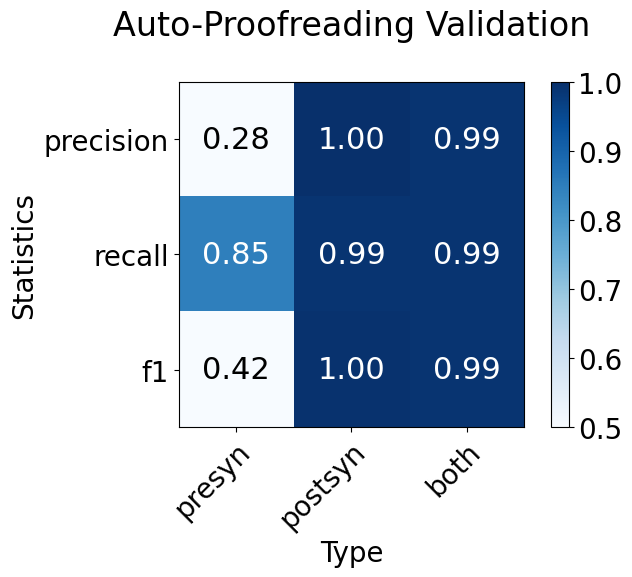

In [48]:
curr_neuron_idx = 6
curr_val_df = validation_dfs_extens[curr_neuron_idx]
segment_id = vu.validation_df_to_old_segment_id(curr_val_df)
vu.synapse_validation_df_to_score_plot(curr_val_df)

In [54]:
vu.plot_validation_synapses(segment_id,
                           validation_df=curr_val_df,
                           synapse_scatter_size = 0.08)

Color key: {'TP_color': 'yellow', 'TN_color': 'aqua', 'FP_color': 'black', 'FN_color': 'orange'}
Using precomputed synapse dict
No axon skeleton attribute stored in database table


/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [122]:
val_border_b = vu.proofread_border_branches(neuron_obj,
                            plot_border_branches = True,
                                           verbose=True)

Using the MESH method for invalid and valid branches
Working on valid_to_valid boundaries
Parent Nodes with at least 2 valid downstream nodes: [2, 10, 13, 56, 60, 62, 65, 66, 70, 74, 78, 85, 94, 98, 124, 136, 164, 170, 174, 181, 193, 202, 207, 220, 221, 231, 240, 241, 242, 244, 245, 249, 251, 253, 255, 256, 258, 261, 264, 266, 267, 268, 275, 278, 279]
45 boundary_branches : [  2  10  13  56  60  62  65  66  70  74  78  85  94  98 124 136 164 170
 174 181 193 202 207 220 221 231 240 241 242 244 245 249 251 253 255 256
 258 261 264 266 267 268 275 278 279]

 Working on visualization type: mesh

 Working on visualization type: skeleton


# Downloading the neuron and the synapse information

In [83]:
segment_id = 864691136311791677
segment_id = 864691135645592260
segment_id = 864691136311791677

In [84]:
minnie.AutoProofreadValidationBorderNeurons() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,decomposition
864691136311791677,0,0.25,30.00,5,0,0,3,=BLOB=


In [85]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id=segment_id,
                                       border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [ ]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False)

In [ ]:
validation_df

In [132]:
import skeleton_utils as sk

In [135]:
dj.config["display.limit"] = 30
curr_table = (minnie.schema.jobs & "table_name='__auto_proofread_validation_border'")
curr_table

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__auto_proofread_validation_border,077ea534023ee66ee5d8e6336bb25774,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,407493,340436,2021-04-20 17:36:38
__auto_proofread_validation_border,0a579e03ebf9cfe9847ae63870dc4ce6,error,=BLOB=,DataJointError: fetch1 should only return one tuple. 0 tuples were found,=BLOB=,celiib@10.66.4.27,at-compute005,1,339494,2021-04-20 13:47:54
__auto_proofread_validation_border,3337772d26c3563d43925ea95a0a6b47,error,=BLOB=,DataJointError: A different version of '864691135945413668_validation_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.66.4.27,at-compute005,1,339496,2021-04-20 14:01:44
__auto_proofread_validation_border,412acee86f4ea518889ca40b2a3f67d1,error,=BLOB=,DataJointError: A different version of '864691135974454639_validation_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,1,339501,2021-04-20 13:54:01
__auto_proofread_validation_border,41722bfd4154e68338ab1110629870a9,error,=BLOB=,AssertionError,=BLOB=,celiib@10.28.0.83,at-compute004,1,339509,2021-04-20 14:23:33
__auto_proofread_validation_border,4fa0f8b78003d9388eb6800d7401708e,error,=BLOB=,DataJointError: fetch1 should only return one tuple. 0 tuples were found,=BLOB=,celiib@10.28.0.83,at-compute004,1,339508,2021-04-20 13:56:48
__auto_proofread_validation_border,57c29cbb4fc2c160b83553f9b243d59d,error,=BLOB=,IndexError: index 0 is out of bounds for axis 0 with size 0,=BLOB=,celiib@10.28.0.83,at-compute004,1,339522,2021-04-20 14:34:17
__auto_proofread_validation_border,58ef45c8ea640a701250b36d62f1851e,error,=BLOB=,DataJointError: A different version of '864691136311740477_validation_full_axon.pbz2' has already been placed.,=BLOB=,celiib@10.28.0.83,at-compute004,1,339514,2021-04-20 14:16:11
__auto_proofread_validation_border,5e78e0be1ba7d9df1bb53e75cd2f7dc3,error,=BLOB=,AssertionError,=BLOB=,celiib@10.66.4.27,at-compute005,1,339498,2021-04-20 14:12:36
__auto_proofread_validation_border,777dd02c41181ca7ee9a337fc3b82f88,error,=BLOB=,IndexError: index 0 is out of bounds for axis 0 with size 0,=BLOB=,celiib@10.28.0.83,at-compute004,407077,339483,2021-04-20 13:44:07


In [140]:
(curr_table & "key_hash='41722bfd4154e68338ab1110629870a9'").delete()#.fetch1("key")

# Processing the Neuron

segment_id segment id for those to be decimated
864691134988386682
864691135113167769
864691135212632448
864691135212690816
864691135233108569
864691135272164113
864691135348272855
864691135382947307
864691135393964789
864691135407289801


In [155]:
minnie.Decomposition() & minnie.AutoProofreadValidationSegment()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135382947307,0,0.25,30.00,7,0,1,=BLOB=,438368,906960,0,0,0,0,1,7,85,33,4536131.335368097,1994069.5276707227,34664.07,168.717,168.717,454.706,451.057,1507,0.0003322214214235731,17.729411764705883,3076102.359,49,0.0004899056741694076,30.755,456666676748.59546,174272641.83756763,100673.16022972646,148456.26817732156,9319728096.91011,4045.6919
864691135393964789,0,0.25,30.00,7,0,1,=BLOB=,1583231,3205448,0,0,0,0,1,5,67,38,2488555.628651147,1275113.9340985562,19231.81,213.138,209.562,402.465,393.673,865,0.0003475911850396728,12.91044776119403,2125213.258,48,0.0004070179765460507,18.021,291860525866.865,179970988.85513783,117281.09370215685,137332.34759768518,6080427622.226354,2649.228
864691135407289801,0,0.25,30.00,7,0,1,=BLOB=,502899,1025919,0,0,0,0,1,7,118,66,5221770.560466199,2706500.4418217237,38200.444,273.695,237.826,450.18,399.559,1810,0.00034662572379250676,15.338983050847459,3404254.843,70,0.0005316875743664765,25.857,437812787946.2093,138828157.5649941,83843.74282180668,128607.52444737266,6254468399.231562,4172.3122
864691135491233631,0,0.25,30.00,7,0,1,=BLOB=,197750,413685,0,0,0,0,1,6,59,33,2546004.8556153155,1018316.2736208101,29918.026,84.801,84.801,358.28,316.183,404,0.00015867998016930794,6.8474576271186445,1356633.961,22,0.00029779587686438585,18.364,146152345191.18634,211788989.26407558,57404.582268899256,107731.59849503897,6643288417.781198,1674.2913
864691135501578306,0,0.25,30.00,7,0,1,=BLOB=,374405,746326,0,0,0,0,1,5,56,17,3114604.4593770537,1213441.7964648742,31281.216,316.296,295.412,549.483,537.866,1464,0.00047004363446291733,26.142857142857142,2625509.681,42,0.000557606018593081,34.857,311988153564.24414,159995962.8499756,100169.4300619618,118829.55748440226,7428289370.577242,5507.0656
864691135510455760,0,0.25,30.00,7,0,1,=BLOB=,313082,641109,0,0,0,0,1,5,67,27,3147761.7240058742,1392824.5462767123,34389.201,286.618,251.801

In [173]:
dj.config["display.limit"] = 60
curr_table = (minnie.schema.jobs & "table_name='__decomposition'")
curr_errors = ((curr_table) & "timestamp>'2021-4-19'" & "status='error'")#.delete()
curr_errors

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [166]:
error_keys = curr_errors.fetch("key")

In [181]:
for e in error_keys:
    new_file = du.get_decomposition_path() / Path(f"{e['segment_id']}_0_25.pbz2")
    print(new_file.exists())
    #new_file.unlink()
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [160]:
new_file.exists()

True

In [ ]:
ver = 0.08
nucleus_ids,nucleus_centers = du.segment_to_nuclei(segment_id,
                                                       nuclei_version=ver)
nucleus_ids

# Exploring the Better Crossover

In [ ]:
pru.edges_to_create_and_delete_crossover #finds the edges to cut
pru.crossover_elimination_limb_branch_dict # turns the edges information into limb branch dict elimination
pru.filter_away_crossovers # filters away the limb branch dict

In [ ]:
nviz = reload(nviz)

In [ ]:
nviz.plot_axon(neuron_obj_test)

In [ ]:
crossover_coordinates = nru.high_degree_branching_coordinates_on_limb(neuron_obj_test[1],
                                                                      min_degree_to_find=4,
                                                                         exactly_equal=True,
                                                                         )
crossover_coordinates.shape

In [ ]:
nviz.add_scatter_to_current_plot(scatters=[crossover_coordinates],
                                scatters_colors=["red"],
                                 scatter_size=0.2
                                )

In [ ]:
from copy import deepcopy
neuron_obj_test = deepcopy(neuron_obj)

In [ ]:
branch_list = [286,294,296,297]
for b in branch_list:
    print(f"{b}: {neuron_obj_test[1][b].width_new}")

In [ ]:
nviz.visualize_neuron(neuron_obj_test,
                      limb_branch_dict=dict(L1=[286,294,296,297]),
                      mesh_soma=False,
                      skeleton_soma=False,
                     mesh_color=dict(L1={286:"red",
                                        294:"green",
                                        296:"aqua",
                                        297:"purple"}),
                     skeleton_color=dict(L1={286:"red",
                                        294:"green",
                                        296:"aqua",
                                        297:"purple"}))

In [ ]:
pru.edges_to_create_and_delete_crossover(
                                        neuron_obj_test[1],
                                        high_degree_offset = 1500,
                                        comparison_distance = 2000,
    
                                        match_threshold = 45,
                                        axon_dependent = True,
                                        require_two_pairs = True,
                                        verbose = False,
                                        )

In [ ]:
limb_edge_dict = dict()
for limb_name in neuron_obj.get_limb_node_names():

    limb_obj = neuron_obj[limb_name]

    edges_to_create,edges_to_delete = edge_function(limb_obj,
                                      verbose=verbose,**kwargs)

    if verbose:
        print(f"\n--- Working on Limb {limb_name} ---\n"
             f"edges_to_create = {edges_to_create}\n"
             f"edges_to_create = {edges_to_create}")

    edges_to_create = list(nu.unique_rows(edges_to_create))
    edges_to_delete = list(nu.unique_rows(edges_to_delete))

    if len(edges_to_create)>0 or len(edges_to_delete):
        limb_edge_dict[limb_name] = dict(edges_to_create=edges_to_create,
                                        edges_to_delete=edges_to_delete)

# doing the new filtering

In [ ]:
exc_crossovers_filter = pru.make_filter_dict("crossovers",
                                                         pru.filter_away_crossovers,
                                                          dict(axon_dependent=True,
                                                              match_threshold = 30)
                                                         )
    
exc_high_degree_coordinates_filter = pru.make_filter_dict("high_degree_coordinates",
                                                         pru.filter_away_high_degree_coordinates,
                                                          dict(axon_dependent=True,min_degree_to_find=4)
                                                         )

exc_axon_on_dendrite_merges_filter = pru.make_filter_dict("axon_on_dendrite_merges",
                                         pru.filter_away_axon_on_dendrite_merges,
                                         dict(use_pre_existing_axon_labels=True)
                                              
                                        )

exc_low_branch_clusters_filter = pru.make_filter_dict("low_branch_clusters",
                                            pru.filter_away_low_branch_length_clusters,
                                            dict())

filter_list = [
    exc_axon_on_dendrite_merges_filter,
    exc_crossovers_filter,
    exc_high_degree_coordinates_filter,
    
    ]

In [ ]:
from importlib import reload
pru = reload(pru)

In [ ]:
#filtered_neuron = neuron_obj
filtered_neuron,filtering_info = pru.proofread_neuron_class_predetermined(neuron_obj,
    inh_exc_class="excitatory",
    perform_axon_classification=False,
                                         
    plot_limb_branch_filter_with_disconnect_effect = True,

    
    plot_final_filtered_neuron = False,

    #arguments for the axon high fidelity:
    plot_new_axon_limb_correspondence = False,
    plot_new_limb_object = False,
    plot_final_revised_axon_branch = False,

    verbose = False,
    verbose_outline = True,
    #filter_list = filter_list
    high_fidelity_axon_on_excitatory = True,
                                                                         )


# Crossover Exploration

# finishing the new filtering

In [ ]:
from pykdtree.kdtree import KDTree
import trimesh_utils as tu


split_index = 0
winning_nucleus_id = nucleus_ids[0]

compute_synapse_to_soma_skeletal_distance = True
return_errored_synapses_ids_non_axons = True
soma_center_in_nm = False
validation=True

original_mesh = du.fetch_segment_id_mesh(segment_id)
original_mesh_kdtree = KDTree(original_mesh.triangles_center)

original_mesh_faces = tu.original_mesh_faces_map(original_mesh,
                                                    filtered_neuron.mesh,
                                                    exact_match=True,
                                                    original_mesh_kdtree=original_mesh_kdtree)

In [ ]:
# getting the axon faces

import classification_utils as clu
import neuron_utils as nru

axon_limb_branch_dict = clu.axon_limb_branch_dict(filtered_neuron)

axon_skeletal_length = nru.sum_feature_over_limb_branch_dict(filtered_neuron,
                                 limb_branch_dict=axon_limb_branch_dict,
                                 feature="skeletal_length")

axon_mesh_area = nru.sum_feature_over_limb_branch_dict(filtered_neuron,
                                     limb_branch_dict=axon_limb_branch_dict,
                                     feature="area")

axon_face_labels = clu.axon_faces_from_labels_on_original_mesh(filtered_neuron,
                                       original_mesh=original_mesh,
                                       original_mesh_kdtree=original_mesh_kdtree,
                                        plot_axon=False,
                                       verbose=False,)

In [ ]:
# doing the synapse filtering
compute_synapse_to_soma_skeletal_distance = False
import proofreading_utils as pru

(keys_to_write_without_version,
         synapse_stats,
         total_error_synapse_ids,
         
) = pru.synapse_filtering(filtered_neuron,
                split_index,
                nucleus_id=winning_nucleus_id,
                segment_id=None,
                return_synapse_filter_info = True,
                return_synapse_center_data = False,
                return_error_synapse_ids = True,
               return_valid_synapse_centers=compute_synapse_to_soma_skeletal_distance,
                return_errored_synapses_ids_non_axons=return_errored_synapses_ids_non_axons,
                mapping_threshold = 500,
                  plot_synapses=False,
                verbose = True,
                original_mesh_method = True,
                original_mesh = original_mesh,
                original_mesh_kdtree = original_mesh_kdtree,
                valid_faces_on_original_mesh=original_mesh_faces, 
                axon_faces_on_original_mesh=axon_face_labels,

                #will only apply the filter if it is excitatory
                apply_non_axon_presyn_errors=True,
                validation=validation,

                )

In [ ]:
valid_synapse_df = pru.valid_synapse_records_to_unique_synapse_df(keys_to_write_without_version)

In [ ]:
validation_df = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                    include_extension_synapse=False,
                                      valid_synapses_ids=valid_synapse_df["synapse_id"].to_list())

vu.synapse_validation_df_to_category_counts(validation_df,
                                            print_postsyn=True,
                                            print_presyn=True)
                                         

In [ ]:
vu.synapse_validation_df_to_score_plot(validation_df)

In [ ]:
# if had the original
validation_df_original = vu.synapse_validation_df_single_neuron(segment_id,
                                        remove_presyn_on_dendrite = False,
                        count_presyn_on_dendrite_as_correct = True,
                                                        include_extension_synapse=False,)
vu.synapse_validation_df_to_category_counts(validation_df_original,
                                            print_postsyn=True,
                                            print_presyn=True)
vu.synapse_validation_df_to_score_plot(validation_df_original)

# Take the Synapse Data and Convert it into form that can be processed by the validation functions